In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Data Preprocessing

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Embarked"]

train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])
train_data["Age"] = train_data["Age"].fillna(28.0)

X = pd.get_dummies(train_data[features])
y = train_data["Survived"]

# Learning and Fine Tuning a Decision Tree Model

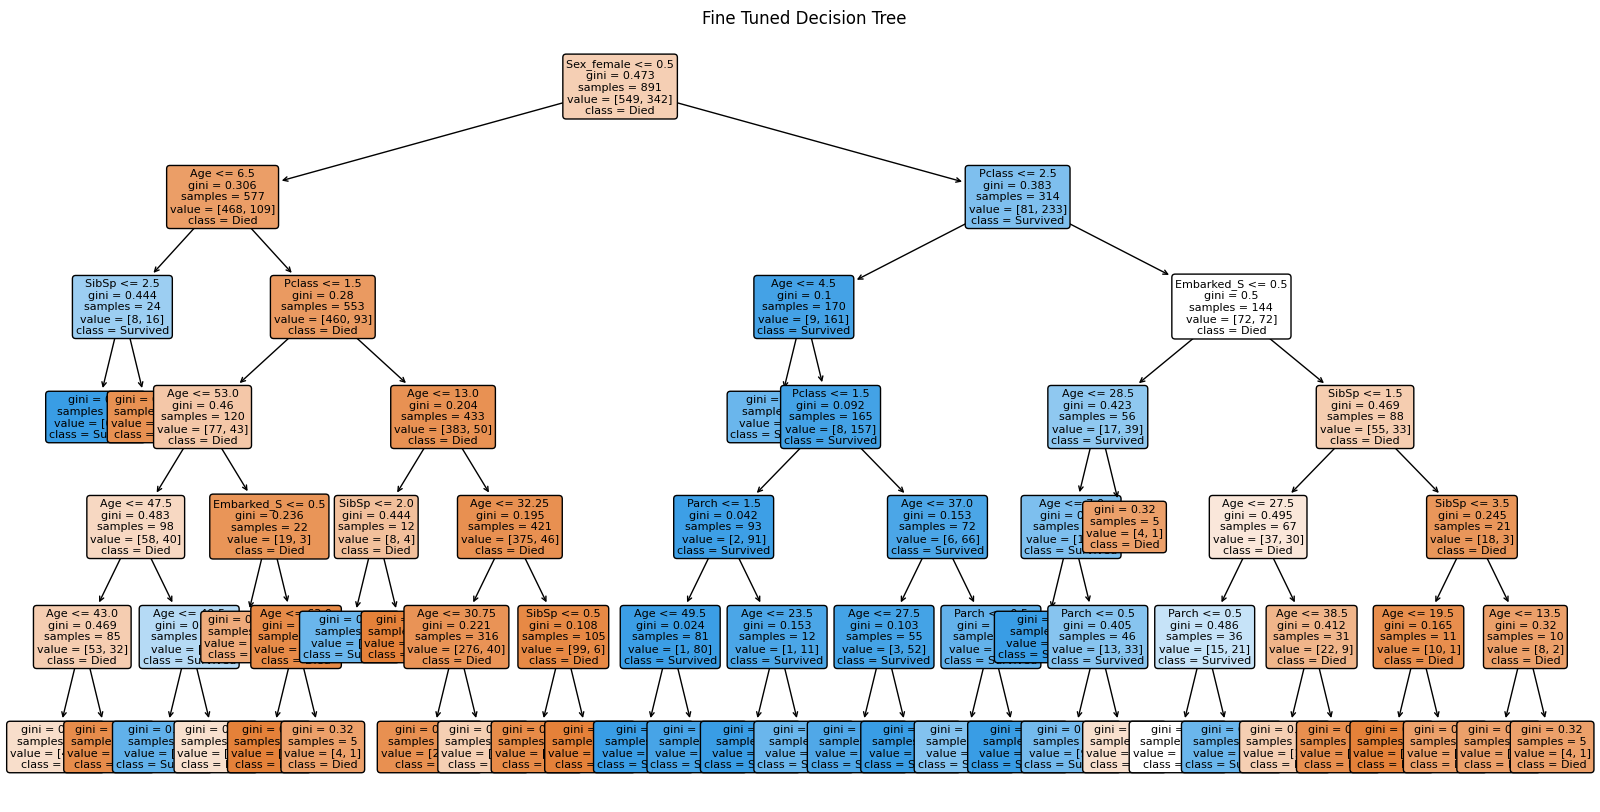

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier(max_depth=6,
                              min_samples_split=10,
                              min_samples_leaf=5,
                              random_state=67
                              )
dtree.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(dtree,
          feature_names=X.columns,
          class_names=["Died", "Survived"],
          filled=True,
          rounded=True,
          fontsize=8
         )
plt.title("Fine Tuned Decision Tree")
plt.show()

# Learning and Fine Tuning a Random Forest Model

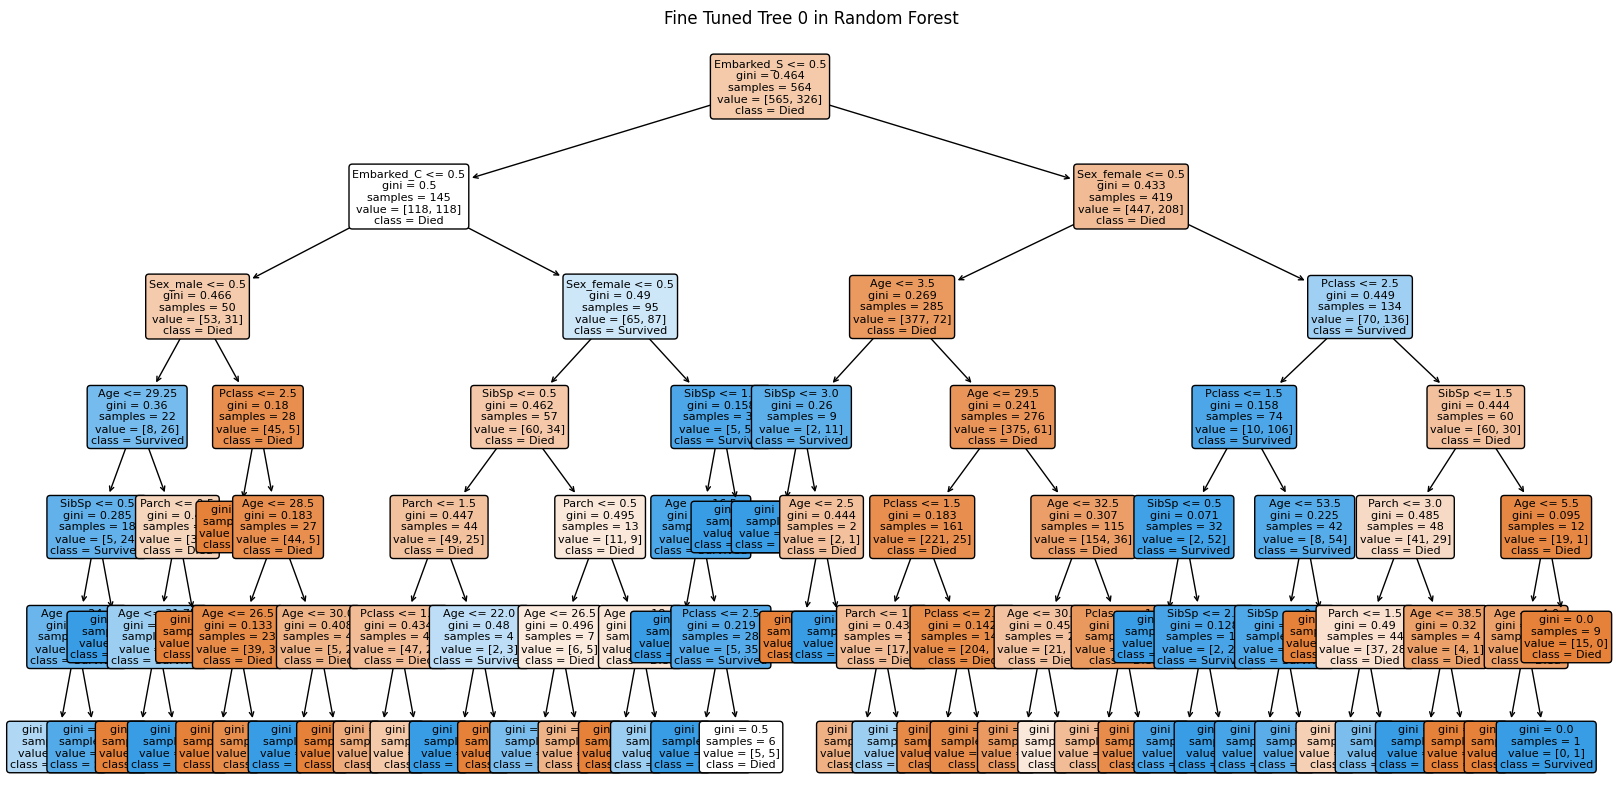

In [7]:
from sklearn.ensemble import RandomForestClassifier

rngforest = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=67)
rngforest.fit(X, y)

predictions = rngforest.predict(X)

plt.figure(figsize=(20, 10))
plot_tree(rngforest.estimators_[0],
          feature_names=X.columns,
          class_names=["Died", "Survived"],
          filled=True,
          rounded=True,
          fontsize=8
         )
plt.title("Fine Tuned Tree 0 in Random Forest")
plt.show()

# Five Fold Cross Validated Decision Tree

In [8]:
from sklearn.model_selection import cross_val_score

dtree_cv_scores = cross_val_score(dtree, X, y, cv = 5, scoring = 'accuracy')

print(f"Average Decision Tree Classification Accruacy: {dtree_cv_scores.mean()}")

Average Decision Tree Classification Accruacy: 0.8024919967359235


# Five Fold Cross Validated Random Forest

In [9]:
rngforest_cv_scores = cross_val_score(rngforest, X, y, cv = 5, scoring = 'accuracy')

print(f"Average Random Forest Classification Accuracy: {rngforest_cv_scores.mean()}")

Average Random Forest Classification Accuracy: 0.8215617349821104


# Algorithm Comparison and Analysis (Decision Tree vs Random Forest)

In [10]:
print(f"Decision Tree 5-fold Cross Validation Scores: {dtree_cv_scores}")
print(f"Random Forest 5-fold Cross Validation Scores: {rngforest_cv_scores}")
print(f"Comparing CV scores: {dtree_cv_scores - rngforest_cv_scores}")

Decision Tree 5-fold Cross Validation Scores: [0.78212291 0.82022472 0.81460674 0.79775281 0.79775281]
Random Forest 5-fold Cross Validation Scores: [0.81005587 0.8258427  0.81460674 0.79775281 0.85955056]
Comparing CV scores: [-0.02793296 -0.00561798  0.          0.         -0.06179775]


In [11]:
print(f"Decision Tree Training Accuracy: {dtree.score(X, y)}")
print(f"Random Forest Training Accuracy: {rngforest.score(X,y)}")


Decision Tree Training Accuracy: 0.8473625140291807
Random Forest Training Accuracy: 0.8574635241301908


In [12]:
print(f"Decision Tree Overfitting: {dtree.score(X,y) - dtree_cv_scores.mean()}")
print(f"Random Forest Overfitting: {rngforest.score(X,y) - rngforest_cv_scores.mean()}")

Decision Tree Overfitting: 0.044870517293257195
Random Forest Overfitting: 0.0359017891480804
